## Tutorial <a id="tutorial"></a> 

The AMPyC package provides many tools commonly used in advanced predictive/optimal control research. Think of it as a Python version of MPT3 in Matlab - if you are familiar with that :\).

This notebook provides an in-depth tutorial for the use of the AMPyC package.

#### Table of Contents
1. [Meet the Polytope class](#polytope)
    - [The Basics](#polytope_basics)
    - [Transformations & Plotting](#polytope_transforms)
1. [Meet the Parameter dataclass](#parameters)
1. [Meet the System class](#systems)
    - [Implement your own System](#own_system)
1. [Meet the Controller class](#controllers)
    - [Closing the loop](#closed-loop)
    - [Implement your own Controller](#own_controller)

### Meet the Polytope class <a id="polytope"></a> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# import the Polytope class from ampyc.utils
from ampyc.utils import Polytope

**General hint:** If you don't know what a method/class is supposed to do, try using the built-in ```help()``` method. Let's try this on the Polytope class.

In [2]:
help(Polytope)

Help on class Polytope in module ampyc.utils.polytope.polytope:

class Polytope(polytope.polytope.Polytope)
 |  Polytope(A: numpy.ndarray | None = None, b: numpy.ndarray | None = None, vertices: numpy.ndarray | None = None, **kwargs) -> ~Polytope
 |  
 |  Improved Polytope class with additional functionality compared to polytope.Polytope.
 |  This class inherits from polytope.Polytope, thus see polytope.Polytope for the full documentation
 |  of all methods and attributes:
 |  https://github.com/tulip-control/polytope
 |  
 |  Method resolution order:
 |      Polytope
 |      polytope.polytope.Polytope
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  Vrep(self)
 |  
 |  __add__(self, other: Union[~Polytope, numpy.ndarray]) -> ~Polytope
 |      Add a Polytope or a vector to this Polytope.
 |      If the other object is a Polytope, it computes the Minkowski sum.
 |      If the other object is a vector, it translates the Polytope by that vector.
 |  
 |  __and__(self, other

#### The Basics <a id="polytope_basics"></a> 
Definition of a polytope object...

In [3]:
# define a polytope in vertex representation
V = np.array([[1, -2], [1, 1], [0, 2], [-1, 2], [-1, -2]])
P = Polytope(vertices=V)

# define a polytope in halfspace representation
A_x = np.array([[1, 0], [-1, 0], [0, 1], [0, -1], [1, 1]])
b_x = np.array([[1], [1], [2], [2], [2]])
X = Polytope(A_x, b_x)

... plotting the polytope ...

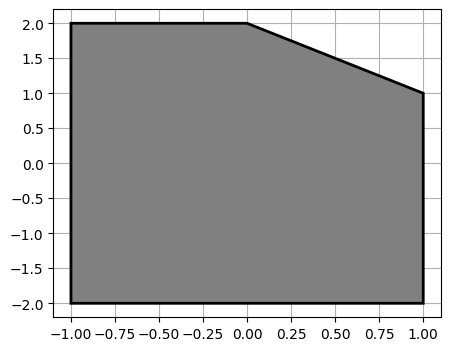

In [4]:
# plot the polytope; we only plot X since it is equivalent to P
_, ax = plt.subplots(1,1, figsize=(5,4))
X.plot(ax, color="gray", alpha=1, edgecolor='black', linewidth=2)

# you can use the provided xlim and ylim properties to set the plot limits
ax.set_xlim(X.xlim)
ax.set_ylim(X.ylim)

plt.grid()
plt.show()

... and accessing its attributes

In [5]:
# get the vertices of the polytope
print("vertices\n{0}\n".format(X.V))

# get halfspace representation
print("halfspace representation\n{0}\t{1}\n".format(X.A, X.b))

# get dimension of the polytope
print("dimension: {0}\n".format(X.dim))

# get volume of the polytope
print("volume: {0}\n".format(X.volume))

vertices
[[ 1. -2.]
 [ 1.  1.]
 [ 0.  2.]
 [-1.  2.]
 [-1. -2.]]

halfspace representation
[[ 1.  0.]
 [-1.  0.]
 [ 0.  1.]
 [ 0. -1.]
 [ 1.  1.]]	[1. 1. 2. 2. 2.]

dimension: 2

volume: 7.6



#### Transformations & Plotting <a id="polytope_transforms"></a> 
Next, let's see how we can transform Polytopes, i.e., scale, translate, etc. It is the same as using numpy :\)

In [6]:
# scale the polytope
X_scaled = 0.5 * X

# translate the polytope
x = np.array([[1], [0.5]]) # move center of the polytope to (1,0.5)
X_translated = x + X

# apply a linear transformation to the polytope
A = np.array([[2, 0.3], [0, 1.2]])
X_transformed = A @ X

But can we somehow visualize these sets? Yes, we can! All Polytopes have a dedicated ```.plot()``` method. 

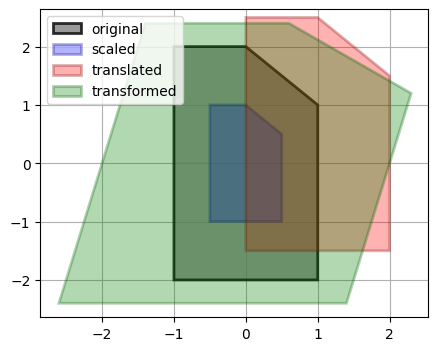

In [7]:
# plot the polytopes
_, ax = plt.subplots(1,1, figsize=(5,4))
X.plot(ax, color="gray", alpha=0.8, edgecolor='black', linewidth=2, label="original")
X_scaled.plot(ax, color="blue", alpha=0.3, edgecolor='darkblue', linewidth=2, label="scaled")
X_translated.plot(ax, color="red", alpha=0.3, edgecolor='darkred', linewidth=2, label="translated")
X_transformed.plot(ax, color="green", alpha=0.3, edgecolor='darkgreen', linewidth=2, label="transformed")

# you can use the provided xlim and ylim properties to automatically set the plot limits
ax.set_xlim(X_transformed.xlim)
ax.set_ylim(X_transformed.ylim)

plt.grid()
plt.legend(loc="upper left")
plt.show()

Apart from simple transformations, we can also use standard operations between two Polytopes, e.g., Minkowski sum, intersections, etc.

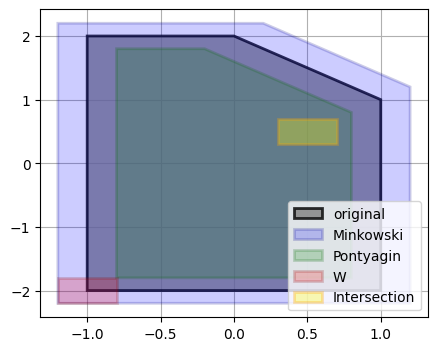

In [8]:
# define another polytope
W = Polytope(A=np.array([[1, 0], [0, 1], [-1, 0], [0, -1]]), b=np.array([[0.2], [0.2], [0.2], [0.2]]))

# Minkowski sum (Polytope addition)
X_minkowski = X + W

# Pontryagin difference (Polytope subtraction)
X_pontryagin = X - W

# intersection with offset W
X_intersection = X & (np.array([[0.5], [0.5]]) + W)

# plot the polytopes
_, ax = plt.subplots(1,1, figsize=(5,4))
X.plot(ax, color="gray", alpha=0.8, edgecolor='black', linewidth=2, label="original")
X_minkowski.plot(ax, color="blue", alpha=0.2, edgecolor='darkblue', linewidth=2, label="Minkowski")
X_pontryagin.plot(ax, color="green", alpha=0.2, edgecolor='darkgreen', linewidth=2, label="Pontyagin")
(X.V[-1] + W).plot(ax, color="red", alpha=0.2, edgecolor='darkred', linewidth=2, label="W")
X_intersection.plot(ax, color="yellow", alpha=0.3, edgecolor='orange', linewidth=2, label="Intersection")

# you can use the provided xlim and ylim properties to set the plot limits
ax.set_xlim(X_minkowski.xlim)
ax.set_ylim(X_minkowski.ylim)

plt.grid()
plt.legend(loc="lower right")
plt.show()

That's it, Polytopes are really easy to work with in AMPyC! For further information, please see the [source code documentation](../ampyc/utils/polytope/polytope.py).

### Meet the Parameter dataclass <a id="parameters"></a> 

In [9]:
# import the parameter dataclass from ampyc.params
from ampyc.params import ParamsBase

The parameter dataclass contains all parameters for a single experiment, i.e., parameters for the controller, the system, the simulation, and the plots.

In [10]:
print(ParamsBase.__doc__)


    Base class for parameters. This class holds all parameters as dataclasses for a single experiment, i.e.,
    - ctrl: controller parameters
    - sys: system parameters
    - sim: simulation parameters
    - plot: plotting parameters
    


To initialize a parameter class, we either define a nested dictionary and instantiate the base parameter class ...

In [11]:
params_init = {
    'ctrl': {
        'name': 'nominal MPC',
        'N': 10,
        'Q': 100 * np.eye(2),
        'R': 10 * np.eye(1)
    },
    'sys': {
        'n': 2,
        'm': 1,
        'A': np.array(
            [
                [1, 0.1],
                [0.1*(-0 + (9.81/1.3)), 1 - 0.1*0.5]
            ]),
        'B': np.array([0, 0.1]).reshape(-1,1),
        'C': np.eye(2),
        'D': np.zeros((2,1)),
        'A_x': np.array(
            [
                [1, 0], 
                [-1, 0],
                [0, 1],
                [0, -1]
            ]),
        'b_x': np.array([1, 1, 1, 1]).reshape(-1,1),
        'A_u': np.array([1, -1]).reshape(-1,1),
        'b_u': np.array([5, 5]).reshape(-1,1),
        'A_w': None,
        'b_w': None,
        "f": None,
        "h": None,
        "noise_generator": None,
    },
    'sim': {
        'num_steps': 30,
        'num_traj': 1,
        'x_0': np.array([0.2, 0.2]).reshape(-1,1)
    },
    'plot': {
        'color': 'red',
        'alpha': 1.0,
        'linewidth': 1.0
    },
}

# instantiate the ParamsBase class with the created dictionary
params = ParamsBase(**params_init)

# the parameter object can also be printed nicely
print(params)

Successfully initialized experiment 'nominal MPC'.
Parameters:
    ctrl:
        'N': 10,
        'Q': array([[100.,   0.],
       [  0., 100.]]),
        'R': array([[10.]]),
        'name': 'nominal MPC'
    sys:
        'A': array([[1.     , 0.1    ],
       [0.75462, 0.95   ]]),
        'A_u': array([[ 1],
       [-1]]),
        'A_w': None,
        'A_x': array([[ 1,  0],
       [-1,  0],
       [ 0,  1],
       [ 0, -1]]),
        'B': array([[0. ],
       [0.1]]),
        'C': array([[1., 0.],
       [0., 1.]]),
        'D': array([[0.],
       [0.]]),
        'b_u': array([[5],
       [5]]),
        'b_w': None,
        'b_x': array([[1],
       [1],
       [1],
       [1]]),
        'f': None,
        'h': None,
        'm': 1,
        'n': 2,
        'noise_generator': None
    sim:
        'num_steps': 30,
        'num_traj': 1,
        'x_0': array([[0.2],
       [0.2]])
    plot:
        'alpha': 1.0,
        'color': 'red',
        'linewidth': 1.0



... or import one of the default parameter classes and directly obtain the default parameters

In [12]:
from ampyc.params import MPCParams
params = MPCParams()

Successfully initialized experiment 'nominal linear MPC'.


If only some of the default parameters need to be changed, a default parameter class can also be instantiated with a partial dictionary

In [13]:
params_init= {
    'ctrl': {
        'N': 15,
    },
    'sys': {
        'dt': 0.25,
        "l": 2.5,
    },
    'sim': {
        'num_traj': 2,
    },
}

# instantiate the MPCParams class updated with the created dictionary
params = MPCParams(**params_init)

Successfully initialized experiment 'nominal linear MPC'.


After creation, the parameters can be accessed as follows.

To see all parameters in a sub-class, e.g., the control parameters:

In [14]:
params.ctrl

MPCParams.ctrl(name='nominal linear MPC', N=15, Q=array([[1., 0.],
       [0., 1.]]), R=array([[10.]]))

Or a single parameter can be accessed with

In [15]:
params.ctrl.N

15

For further information on the Parameter dataclass, see the [source code documentation](../ampyc/params/params_base.py).

### Meet the System class <a id="systems"></a>

AMPyC provides general classes for discrete-time linear, linear affine, and nonlinear systems. Note that, the package only implements discrete-time systems, i.e., if you are working with continuous systems, you have to discretize before using this class (or implement your own system, [see below](#own_system)).

Let's see how to use a linear system

In [16]:
# import the LinearSystem class from ampyc.systems
from ampyc.systems import LinearSystem

# reload the default MPC parameters
params = MPCParams()

# print the docstring of the LinearSystem class
print(f"\nLinearSystem:\n{LinearSystem.__doc__}")

# instantiate the LinearSystem class with the loaded parameters
sys = LinearSystem(params.sys)

Successfully initialized experiment 'nominal linear MPC'.

LinearSystem:

    Implements a linear system of the form:
    .. math::
        x_{k+1} = A x_k + B u_k + w_k \
        y_k = C x_k + D u_k

    where :math:`x` is the state, :math:`u` is the input, :math:`y` is the output, and :math:`w` is a disturbance.
    


After creation of the system class, we can evaluate the state dynamics and output equations separately using the ```get_state()``` and ```get_output()``` methods...

In [17]:
print(sys.get_state.__doc__)
print(sys.get_output.__doc__)


        Advance system from state x with input u, and adding a disturbance.
        
        Args:
            x: Current state of the system
            u: Input to the system
        Returns:
            x_next: Next state of the system after applying the input and adding a disturbance
                    sampled from the noise generator.
        

        Evaluate output function for state x and input u.
        
        Args:
            x: Current state of the system
            u: Input to the system
        Returns:
            output: Output of the system after evaluating the output function.
        


... or directly evaluate both using the ```step()``` method

In [18]:
print(sys.step.__doc__)


        Advances the system by one time step, given state x & input u and returns the output.
        This method calls get_state and get_output methods in sequence.

        Args:
            x: Current state of the system
            u: Input to the system
        Returns:
            x_next: Next state of the system after applying the input and adding a disturbance.
            output: Output of the system after evaluating the output function.
        


The ```step()``` method returns both the next state and the output, i.e., we can use it to store both the state and output trajectories.

Next, let's see how we would simulate such a system for a number of time steps

In [19]:
# number of steps to 10 and obtain the initial state from the parameters
num_steps = 8
x_0 = params.sim.x_0

# allocate state and output trajectories
x = np.zeros((num_steps+1, sys.n, 1))
y = np.zeros((num_steps, sys.n, 1))
x[0,:] = x_0 # set the initial state

# simulate the system
for j in range(num_steps):
    x_next, output = sys.step(x[j,:], np.zeros((1,))) # step the system with zero input
    x[j+1,:] = x_next # store the next state
    y[j,:] = output # store the output

Since the output equation is the identity, the state and output trajectories are equivalent. However, the state trajectory is one step longer than the output equation

In [20]:
print(f"state trajectory:\n{x.squeeze().T},\n\noutput trajectory:\n{y.squeeze().T}")

state trajectory:
[[ 0.43633  0.41015  0.41821  0.45681  0.52504  0.62433  0.75828  0.93265
   1.15551]
 [-0.2618   0.08055  0.38603  0.68232  0.99292  1.33948  1.74364  2.22867
   2.82102]],

output trajectory:
[[ 0.43633  0.41015  0.41821  0.45681  0.52504  0.62433  0.75828  0.93265]
 [-0.2618   0.08055  0.38603  0.68232  0.99292  1.33948  1.74364  2.22867]]


For convenience, the AMPyC package also contains basic plotting functions. Here we use a state phase plot to visualize the state trajectory.

**Note:** All plotting functions shipped with the AMPyC package assume a 2D state and a 1D input.

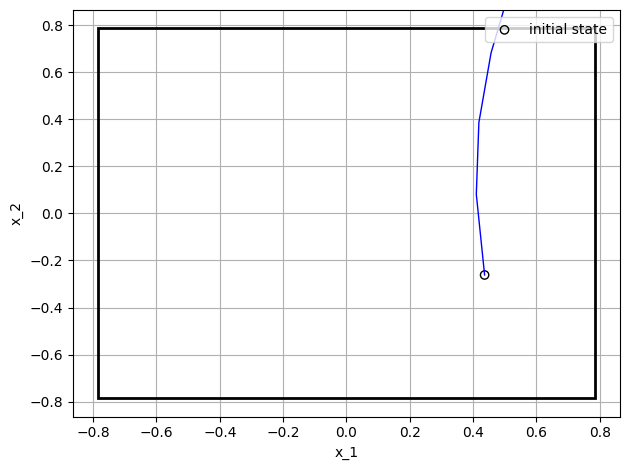

In [21]:
# import the state-state plotting function from ampyc.plotting
from ampyc.plotting import plot_x_state_state

# plot the state trajectory including the state constraints
plot_x_state_state(1, y, sys.X, params.plot)

The system we defined is clearly unstable, a bit later we will see how we can stabilize the system using a controller

#### Implement your own System <a id="own_system"></a> 

Instead of using the predefined systems, you can also use the System base class to implement your own system type.

In [22]:
from ampyc.systems import SystemBase
print(SystemBase.__doc__)


    Base class for all systems. It defines the interface for the system and the methods
    that must be implemented by a derived system.

    It defines a general nonlinear system of the form:
    .. math::
        x_{k+1} = f(x_k, u_k) + w_k \
        y_k = h(x_k, u_k)

    where :math:`x` is the state, :math:`u` is the input, :math:`y` is the output, and :math:`w` is a disturbance.

    This class is an abstract base class and should not be instantiated directly. Instead, derive a system from
    this class and implement the following required methods:
    - update_params: update the system parameters, e.g., after a change in the system dimensions. This is also called
                     during initialization.
    - f: state update function to be implemented by the inherited class
    - h: output function to be implemented by the inherited class

    Usage:
    - get_state: Evaluates :math: `x_{k+1} = f(x_k, u_k) + w_k`
    - get_output: Evaluates :math: `y_k = h(x_k, u_k)`
    - 

Example implementation of a linear system

In [23]:
# inherit from SystemBase; no need for an __init__ method
class ExampleSystem(SystemBase):
    
    # only need to store/set the dynamics parameters; constraints etc. are stored/set by the base class
    def update_params(self, params):
        super().update_params(params)
        self.A = params.A
        self.B = params.B
        self.C = params.C
        self.D = params.D

    # implement state dynamics f using the state space matrices; disturbances are added by base class
    def f(self, x, u):
        return self.A @ x.reshape(self.n, 1) + self.B @ u.reshape(self.m, 1)

    # implement output dynamics h using the state space matrices
    def h(self, x, u):
        return self.C @ x.reshape(self.n, 1) + self.D @ u.reshape(self.m, 1)

For further information on the System class, see the [source code documentation](../ampyc/systems/system_base.py).

### Meet the Controller class <a id="controllers"></a> 

The AMPyC package provides several reference implementations of optimization-based controllers (e.g. linear model predictive control (MPC)), for a full list of implemented controllers see the [README](../README.md). Additionally, the Controller base class allows implementation of optimization-based or non-optimization-based controllers, [as shown later](#own_controller).

First, let's see how to use linear MPC.

In [24]:
# reload the default MPC parameters & re-initialize the linear system
params = MPCParams()
sys = LinearSystem(params.sys)

# import the MPC controller from ampyc.controllers
from ampyc.controllers import MPC

# instantiate the MPC controller with the system and parameters
ctrl = MPC(sys, params.ctrl)

Successfully initialized experiment 'nominal linear MPC'.


The MPC class implements a standard linear MPC controller

In [25]:
print(MPC.__doc__)


    Implements a standard linear nominal MPC controller, see e.g. Example 2.5 in:

    J. B. Rawlings, D. Q. Mayne, and M. M. Diehl, "Model Predictive Control: Theory and Design",
    2nd edition, Nob Hill Publishing, 2009.

    More information is provided in Chapter 1 of the accompanying notes:
    https://github.com/IntelligentControlSystems/ampyc/notes/01_intro.pdf
    


Since AMPyC is mainly intended for optimization-based controllers, the package provides a convenience function to list all available solvers

In [26]:
# import the convenience function from ampyc.controllers
from ampyc.controllers import available_solvers

# print all avilable solvers
available_solvers()

CVXPY available solvers:
    [   'CLARABEL',
    'CVXOPT',
    'ECOS',
    'ECOS_BB',
    'GLPK',
    'GLPK_MI',
    'OSQP',
    'SCIPY',
    'SCS']
further information on solvers at:
    https://www.cvxpy.org/tutorial/solvers/index.html

CasADi available solvers:
    [   'ampl', 'blocksqp', 'bonmin', 'fatrop', 'ipopt', 'qrsqp', 'scpgen',
    'sqpmethod', 'feasiblesqpmethod']
further information on solvers at:
    https://web.casadi.org/api/internal/d4/d89/group__nlpsol.html



The solvers are split into two categories (CVXPY and CasADi), since the package uses [CVXPY](https://www.cvxpy.org/) to implement convex optimization problems and [CasADi](https://web.casadi.org/) to implement nonconvex optimization problems.

If you are unsure which type of optimization problem a controller implements, you can check the type of the internal problem formulation

In [27]:
type(ctrl.prob)

cvxpy.problems.problem.Problem

This is important, since choosing an installed but wrong solver will lead to an error. For example, choosing ```ipopt``` (nonlinear solver) for a CVXPY (convex optimization problem) object, will result in a "solver not installed" error.

In [28]:
# ctrl implements a cvxpy.problem, but we choose "ipopt" as the solver
sol_u, sol_x, error_msg = ctrl.solve(x_0.flatten(), additional_parameters={}, verbose=False, solver="ipopt")
print(error_msg)

Solver encountered an error. The solver ipopt is not installed.


To obtain a control input from an optimization-based controller, use its ```solve()``` method. It uses a state, some optional parameters, a verbosity flag, and a solver flag as inputs and returns input and state/output trajectories plus a status message

In [29]:
sol_u, sol_x, error_msg = ctrl.solve(x_0.flatten(), additional_parameters={}, verbose=True, solver="ECOS")

                                     CVXPY                                     
                                     v1.6.5                                    
(CVXPY) Jun 23 04:30:48 PM: Your problem has 32 variables, 84 constraints, and 2 parameters.
(CVXPY) Jun 23 04:30:48 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Jun 23 04:30:48 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Jun 23 04:30:48 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Jun 23 04:30:48 PM: Compiling problem (target solver=ECOS).
(CVXPY) Jun 23 04:30:48 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing -> ECOS
(CVXPY) Jun 23 04:30:48 PM: Apply

Setting the verbose flag to True, will result in very verbose output, i.e., only use this for debugging.

The MPC controller used here, will output the complete input and state trajectory optimized over the horizon

In [30]:
print(f"state trajectory:\n{sol_x.squeeze()},\n\ninput trajectory:\n{sol_u.squeeze()}")

state trajectory:
[[ 0.43633  0.41015  0.36821  0.31479  0.25712  0.19964  0.14511  0.09554
   0.05288  0.01971  0.     ]
 [-0.2618  -0.41945 -0.53422 -0.57662 -0.57483 -0.5453  -0.49573 -0.42661
  -0.33165 -0.19712 -0.     ]],

input trajectory:
[-5.      -4.45253 -3.46964 -2.64583 -1.93248 -1.28346 -0.65164  0.01538
  0.7804   1.72391]


For convenience, the AMPyC package also contains basic plotting functions. Here we use a state-state plot and an input-time plot to visualize the trajectories produced by the MPC.

**Note:** Most plotting functions shipped with the AMPyC package assume a 2D state and a 1D input.

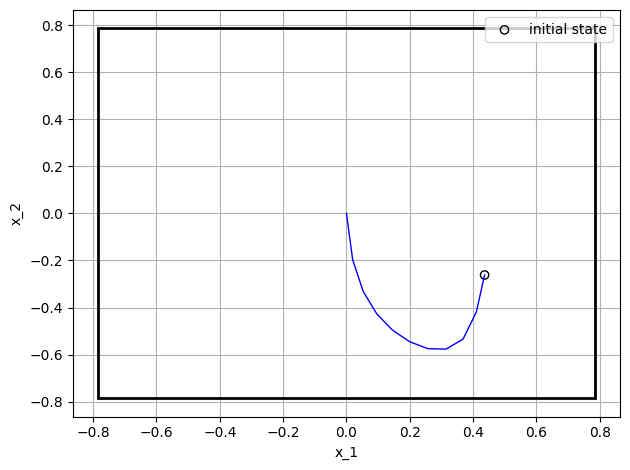

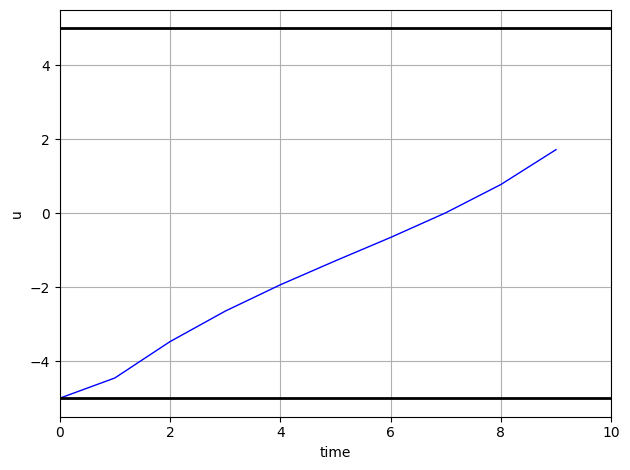

In [31]:
# import the input-time plotting function from ampyc.plotting
from ampyc.plotting import plot_u

# plot the state trajectory including the state constraints
plot_x_state_state(1, sol_x.squeeze().T, sys.X, params.plot)

# plot the input trajectory including the input constraints
plot_u(2, sol_u.squeeze(), sys.U, params.plot)

#### Closing the Loop <a id="closed-loop"></a> 

Now, we put everything together and simulate the system in closed-loop with the controller

In [32]:
# get simulation parameters
num_steps = params.sim.num_steps
num_traj = 1 # only simulate a single trajectory

# get initial state from the parameters
x_0 = params.sim.x_0

# allocate state and input trajectories
x = np.zeros((num_steps+1, sys.n, num_traj))
u = np.zeros((num_steps, num_traj))
x[0,:,:] = x_0

# control-loop: loop over the number of trajectories and steps
for i in range(num_traj):
    for j in range(num_steps):
        # get the control input by solving the MPC problem
        sol_u, sol_x, error_msg = ctrl.solve(x[j,:,i], additional_parameters={}, verbose=False)

        # check if the solver returned an error message
        if error_msg != None:
            raise Exception(error_msg)
        
        # advance the system
        u[j,i] = sol_u[:,0].item() # need .item(), since u is a scalar
        x[j+1,:,i] = sys.get_state(x[j,:,i], u[j,i]).reshape(-1) # here we directly use the get_state method, since the output equation is the identity

Let's plot the simulated closed-loop trajectories. Additionally to the figures above, we also plot the states vs. time, using another convenience function provided by the AMPyC package.

**Note:** All plotting functions shipped with the AMPyC package assume a 2D state and a 1D input.

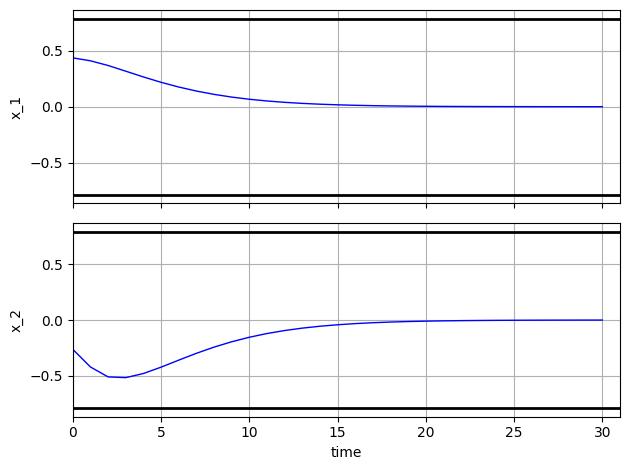

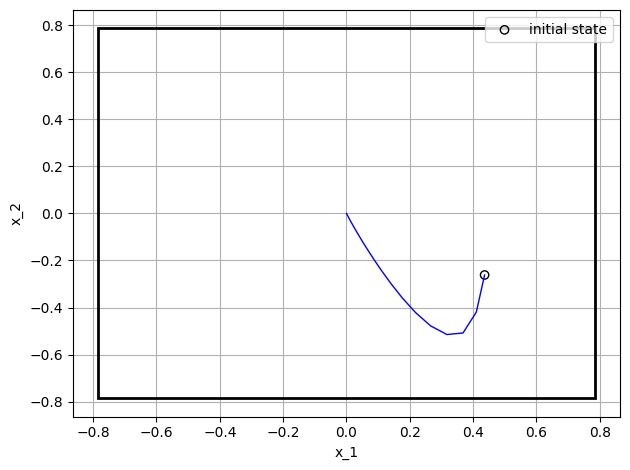

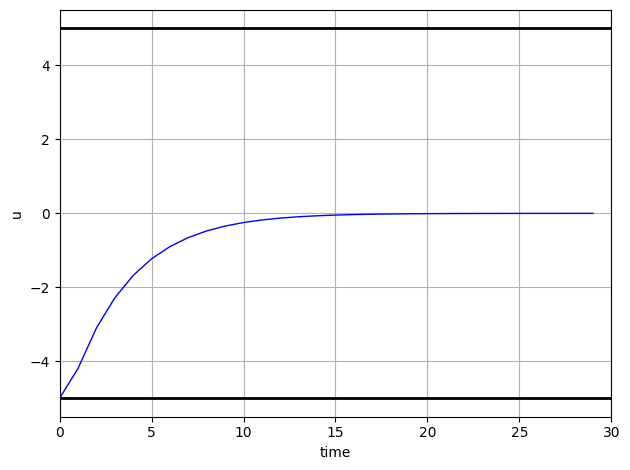

In [33]:
from ampyc.plotting import plot_x_state_time

# plot the closed-loop state and input trajectories
plot_x_state_time(1, x, sys.X, params.plot)
plot_x_state_state(2, x, sys.X, params.plot)
plot_u(3, u, sys.U, params.plot)

The plotting functions also allow to plot several trajectories in the same figure. This is handled via the figure number (first) argument. To plot in the same figure, use the same figure number. Additionally, the plotting functions allow to label the individual trajectories.

To show case this, we create a symmetric trajectories to the one computed above and plot both trajectories.

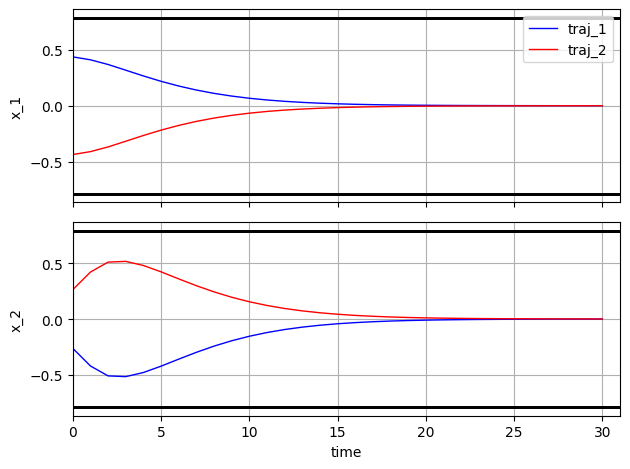

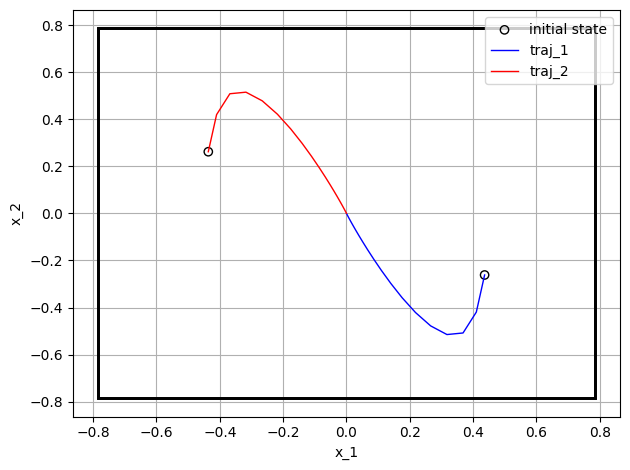

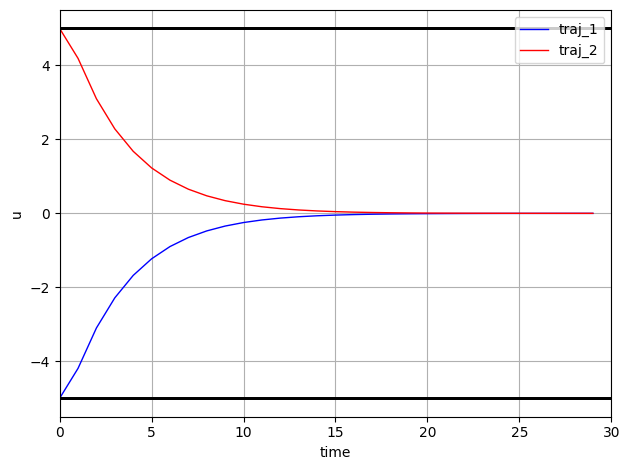

In [34]:
# plot the same closed-loop trajectories as above, but use a label for the legend
plot_x_state_time(1, x, sys.X, params.plot, label='traj_1')
plot_x_state_state(2, x, sys.X, params.plot, label='traj_1')
plot_u(3, u, sys.U, params.plot, label='traj_1')

# set a different color for the second trajectory
params.plot.color = 'red' 
# plot the symmetric closed-loop trajectories in the same figures
plot_x_state_time(1, -x, sys.X, params.plot, label='traj_2')
plot_x_state_state(2, -x, sys.X, params.plot, label='traj_2')
plot_u(3, -u, sys.U, params.plot, label='traj_2')

The plotting functions also allow to use custom units. The system we have been using so far is a simplified Segway system (see accompanying notes for further details), hence the system operates in angular coordinates.

To show case the plotting in this setting, we first convert the state trajectory from radians to degrees and then plot the trajectory again.

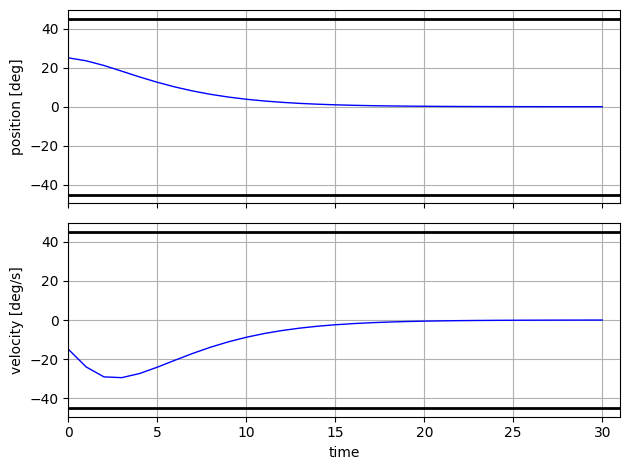

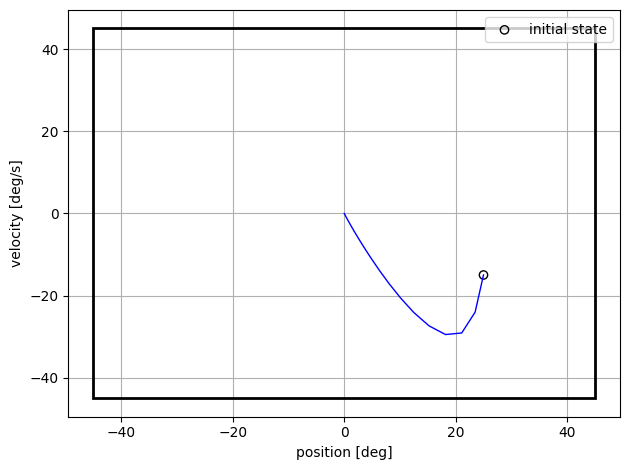

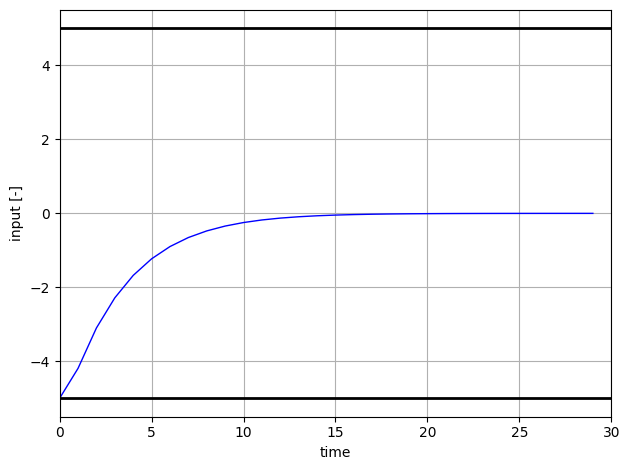

In [35]:
# reset the color for the next plots
params.plot.color = 'blue'

# convert the state trajectory and the state constraints to degrees for plotting
x_deg = np.rad2deg(x)
X_deg = (180/np.pi) * sys.X

# plot the closed-loop trajectories in degrees
plot_x_state_time(1, x_deg, X_deg, params.plot, axes_labels=['position [deg]', 'velocity [deg/s]'])
plot_x_state_state(2, x_deg, X_deg, params.plot, axes_labels=['position [deg]', 'velocity [deg/s]'])
plot_u(3, u, sys.U, params.plot, axes_labels=['input [-]'])

#### Implement your own Controller <a id="own_controller"></a> 

Instead of using the already implemented controllers, you can also use the Controller base class to implement your own optimization-based controller.

In [36]:
# import the Controller base class from ampyc.controllers
from ampyc.controllers import ControllerBase
print(ControllerBase.__doc__)


    Base class for all controllers. It defines the interface for the controller and the methods
    that must be implemented by a derived controller.

    This class is an abstract base class and should not be instantiated directly. Instead, derive a controller from
    this class and implement the following required methods:
    - _init_problem: to define the optimization problem of the controller
    - _define_output_mapping: to define the mapping from optimization variables to outputs
    - [optional] _set_additional_parameters: to set additional parameters of the optimization problem

    Attributes:
        sys: internal copy of a system object
        params: internal copy of a parameters object
        prob: optimization problem object, either a CVXPY Problem or a CasADi Opti object
    


As an example, we implement a standard tube-MPC [1] using a polytopic robust positive invariant (RPI) tube. For that, we first need to implement a function that computes a minimal RPI set.

[1] D. Q. Mayne, M. M. Seron, and S. V. Rakovic, "Robust model predictive control of constrained linear systems with bounded disturbances", Automatica, 2005.

First, we define a polytopic disturbance set, which we will use as an additive disturbance for the linear system

In [37]:
# import the polytopic noise class from ampyc.noise
from ampyc.noise import PolytopeNoise

# define a disturbance polytope in halfspace representation
A_w = np.array([[1, 0], [-1, 0], [0, 1], [0, -1]])
b_w = np.array([[0.04], [0.04], [0.04], [0.04]])
W = Polytope(A_w, b_w)

Let's plot the defined disturbance polytope and the state constraints

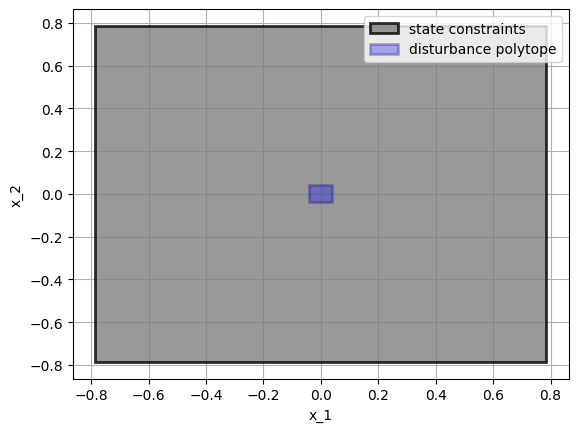

In [38]:
# plot the state constraints and the disturbance polytope
sys.X.plot(color="gray", alpha=0.8, edgecolor='black', linewidth=2, label="state constraints")
W.plot(color="blue", alpha=0.3, edgecolor='darkblue', linewidth=2, label="disturbance polytope")

# you can use the provided xlim and ylim properties to set the plot limits
plt.xlim(sys.X.xlim)
plt.ylim(sys.X.ylim)

# add a grid, axes labels, and the legend
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(loc="upper right")
plt.show()

Next, add the defined disturbance polytope to the default MPC parameters, and re-initialize the linear system

In [39]:
# add the disturbance polytope to the system parameters
params_init = {"ctrl": {"name": "tube-MPC"}, "sys": {"A_w": A_w, "b_w": b_w}}
params = MPCParams(**params_init)

# the noise generator needs to be set manually
params.sys.noise_generator = PolytopeNoise(W)

# print the updated parameters to verify the parameters were updated correctly
print(params)

# re-initialize the linear system with the updated parameters
sys = LinearSystem(params.sys)

Successfully initialized experiment 'tube-MPC'.
Parameters:
    ctrl:
        'N': 10,
        'Q': array([[1., 0.],
       [0., 1.]]),
        'R': array([[10.]]),
        'name': 'tube-MPC'
    sys:
        'A': array([[1.     , 0.1    ],
       [0.75462, 0.95   ]]),
        'A_u': array([[ 1],
       [-1]]),
        'A_w': array([[ 1,  0],
       [-1,  0],
       [ 0,  1],
       [ 0, -1]]),
        'A_x': array([[ 1,  0],
       [-1,  0],
       [ 0,  1],
       [ 0, -1]]),
        'B': array([[0. ],
       [0.1]]),
        'C': array([[1., 0.],
       [0., 1.]]),
        'D': array([[0.],
       [0.]]),
        'b_u': array([[5],
       [5]]),
        'b_w': array([[0.04],
       [0.04],
       [0.04],
       [0.04]]),
        'b_x': array([[0.7854],
       [0.7854],
       [0.7854],
       [0.7854]]),
        'c': 0.5,
        'dt': 0.1,
        'g': 9.81,
        'k': 0.0,
        'l': 1.3,
        'm': 1,
        'n': 2,
        'noise_generator': <ampyc.noise.PolytopeNoise obj

Before implementing tube-MPC, we need a function that computes the minimal polytopic RPI set for a given system, which we will use as the tube. For the implementation we use the fact that the sequence of disturbance reachable sets (DRS; implementation provided by AMPyC) converges to the minimal RPI set in the limit.

In [40]:
# import LQR and the DRS computation from ampyc.utils and some additional utilities
from numpy.linalg import matrix_power
from ampyc.utils import LQR, compute_drs, _reduce

def min_rpi(sys, params):
    """
    Compute the minimal robust positively invariant (RPI) set for the system.
    
    Parameters
    ----------
    sys : LinearSystem
        The linear system to compute the RPI set for.
    params : MPCParams
        The MPC parameters.
    
    Returns
    -------
    Polytope
        The minimum robust positively invariant set.
    """
    
    # compute the LQR gain as the tube controller
    K, P = LQR(sys.A, sys.B, params.Q, params.R)

    # determine how many steps we need for the DRS computation to converge
    # NOTE: this is a heuristic and there exists more efficient methods to compute the minimal RPI set
    i = 0
    while True:
        # compute the matrix power of (A + B @ K)
        A_pow = matrix_power(sys.A + sys.B @ K, i)

        # compute the resulting transformation of the noise polytope W
        A_pow_W = A_pow @ sys.W

        # check if the vertices of the transformed polytope are below a given threshold
        # if the set A^i @ W is small enough, we can assume the DRS sequence has converged
        if np.all(np.abs(A_pow_W.V) < 1e-4):
            break

        # iterate
        i += 1

    # compute the DRS for the computed number of steps
    F = compute_drs(sys.A + sys.B @ K, sys.W, i)

    # return the last set, the LQR controller, and the LQR cost
    return _reduce(F[-1]), K, P

Compute the minimal RPI set (i.e. the tube we will use for tube-MPC) and the corresponding tube controller, this might take a few seconds. Then, plot the tube in the state and input constraints (using a convenience function, provided by AMPyC)

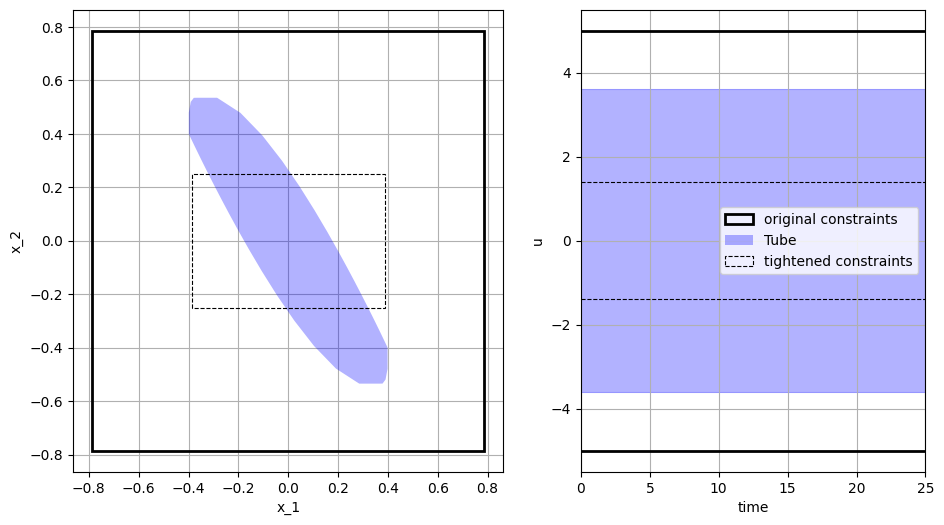

In [41]:
# compute the minimal RPI set and the corresponding tube controller
F, K, _ = min_rpi(sys, params.ctrl)

# import the tube plotting function from ampyc.plotting
from ampyc.plotting import plot_tubes

# plot the tube; first we re-set the alpha prameter for plotting
params.plot.alpha = 0.3
plot_tubes(1, F, K, sys.X, sys.U, params.plot)

Now we can implement tube-MPC

In [42]:
# import CVXPY to formulate the optimization problem
import cvxpy as cp

class TubeMPC(ControllerBase):
    """
    Controller class that implements a standard tube-MPC controller.

    This controller computes a robust positively invariant (RPI) tube around the nominal trajectory
    and uses it to tighten the state and input constraints.
    
    For more information see:
    D. Q. Mayne, M. M. Seron, and S. V. Rakovic, "Robust model predictive control of constrained linear
    systems with bounded disturbances", Automatica, 2005.
    """

    def _init_problem(self, sys, params, *args, **kwargs):
        # compute RPI tube
        F, self.K, P = min_rpi(sys, params)

        # tighten the constraints
        X_tight = sys.X - F
        U_tight = sys.U - self.K @ F

        # define optimization variables
        self.z = cp.Variable((sys.n, params.N+1))
        self.v = cp.Variable((sys.m, params.N))
        self.x_0 = cp.Parameter((sys.n))

        # define the objective
        objective = 0.0
        for i in range(params.N):
            objective += cp.quad_form(self.z[:, i], params.Q) + cp.quad_form(self.v[:, i], params.R)
        objective += cp.quad_form(self.z[:, -1], P) # terminal cost

        # define the constraints
        constraints = [F.A @ (self.x_0 - self.z[:, 0]) <= F.b] # the initial nominal state is freely optimized within the RPI set
        for i in range(params.N):
            constraints += [self.z[:, i+1] == sys.A @ self.z[:, i] + sys.B @ self.v[:, i]]
            constraints += [X_tight.A @ self.z[:, i] <= X_tight.b]
            constraints += [U_tight.A @ self.v[:, i] <= U_tight.b]
        constraints += [self.z[:, -1] == 0.0] # terminal state is fixed to zero

        # define the CVX optimization problem object
        self.prob = cp.Problem(cp.Minimize(objective), constraints)
    
    def _define_output_mapping(self):
        return {
            'control': self.v,
            'state': self.z,
        }

Now, we can use the controller and simulate it in closed-loop with the system. This will take a second, since multiple trajectories are computed.

In [43]:
# instantiate the TubeMPC controller with the system and parameters
tube_mpc = TubeMPC(sys, params.ctrl)

# get the simulation parameters
num_steps = params.sim.num_steps
num_traj = params.sim.num_traj

# get the initial state from the parameters
x_0 = params.sim.x_0

# set seed for reproducibility
sys.noise_generator.seed(42)

# allocate state and input trajectories
x = np.zeros((num_steps+1, sys.n, num_traj))
u = np.zeros((num_steps, num_traj))
x[0,:,:] = x_0

# simulate the closed-loop
for i in range(num_traj):
    for j in range(num_steps):
        # get the control input by solving the tube-MPC problem
        sol_u, sol_x, error_msg = tube_mpc.solve(x[j,:,i], additional_parameters={}, verbose=False)

        # check if the solver returned an error message
        if error_msg != None:
            raise Exception(error_msg)
        
        # compute the control law using the optimized nominal state and nominal input
        pi = sol_u[:,0] + tube_mpc.K @ (x[j,:,i] - sol_x[:,0])

        # advance the system
        u[j,i] = pi.item() # need .item(), since u is a scalar
        x[j+1,:,i] = sys.get_state(x[j,:,i], u[j,i]).reshape(-1)

Then, we can plot the closed-loop trajectories

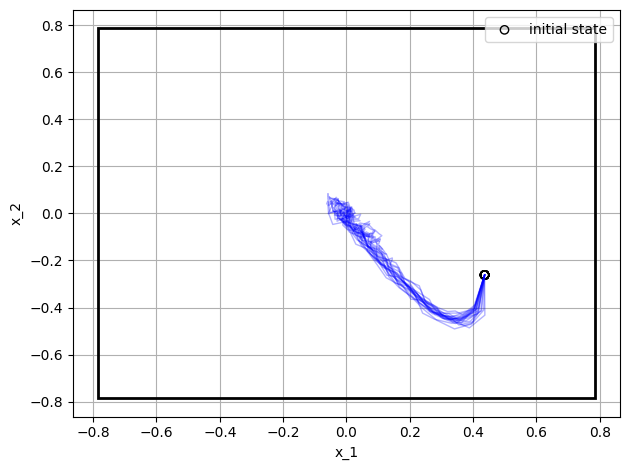

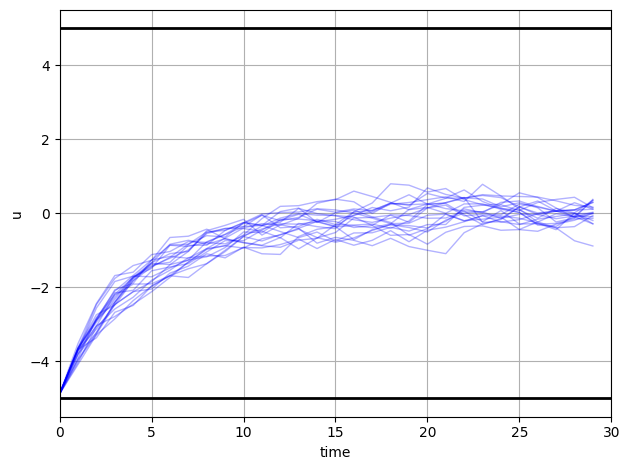

In [44]:
# plot the closed-loop state and input trajectories
plot_x_state_state(1, x, sys.X, params.plot)
plot_u(2, u, sys.U, params.plot)

For MPC controllers, we are often interested in the region of attraction (RoA), i.e., the set of initial states for which the MPC controller is feasible. The AMPyC packages also provides a utility method to compute this set. However, note that the method assumes a system with two dimensional state space!

Since computing the RoA will include solving the MPC for initial states close to infeasibility, you might encounter solver warnings regarding numerical inaccuracies. Here, these warnings can be safely ignored.

 12%|█▏        | 3/25 [00:00<00:03,  7.11it/s]/home/jerome/Documents/venvs/ampyc/lib/python3.10/site-packages/cvxpy/problems/problem.py:1504: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 25/25 [00:03<00:00,  7.64it/s]


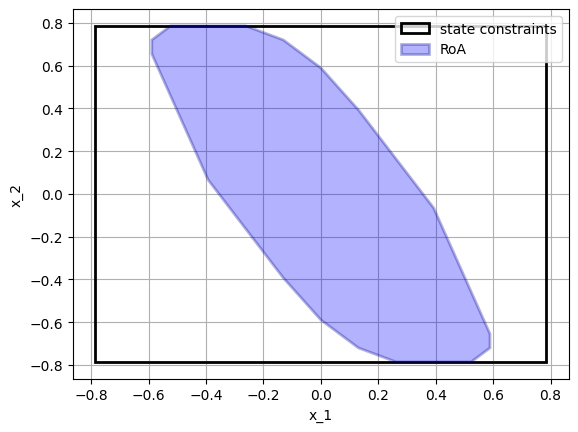

In [45]:
# import the RoA computation method from ampyc.utils
from ampyc.utils import compute_RoA

# compute the region of attraction (RoA) for tube-MPC
RoA = compute_RoA(tube_mpc, sys, solver="ECOS")

# plot the RoA together with the state constraints
sys.X.plot(fill=False, alpha=1, edgecolor='black', linewidth=2, label="state constraints")
RoA.plot(color="blue", alpha=0.3, edgecolor='darkblue', linewidth=2, label="RoA")

# you can use the provided xlim and ylim properties to set the plot limits
plt.xlim(sys.X.xlim)
plt.ylim(sys.X.ylim)

# add a grid, axes labels, and the legend
plt.grid()
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.legend(loc="upper right")
plt.show()

For further information on the Controller class, see the [source code documentation](../ampyc/controllers/controller_base.py).